In [1]:
import tensorflow as tf
import numpy as np    
import pandas as pd
from tensorflow import keras  

In [2]:
data = tf.keras.datasets.cifar10

(train_image,train_label), (test_image, test_label) = data.load_data()
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
class_name = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
train_image.shape #32x32 pixel

(50000, 32, 32, 3)

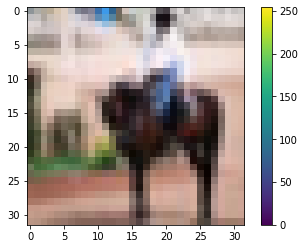

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[11])
plt.grid(False)
plt.colorbar()
plt.show()

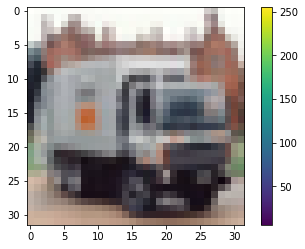

In [6]:
plt.figure()
plt.imshow(test_image[11])
plt.grid(False)
plt.colorbar()
plt.show()

In [7]:
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

In [18]:
def load_dataset():
  (trainX,trainY),(testX,testY) = tf.keras.datasets.cifar10.load_data()
  trainY = keras.utils.to_categorical(trainY)
  trainX = keras.utils.to_categorical(testY)
  return(trainX,trainY,testX,testY)

In [9]:
def prep_pixels(train,test):
  train_norm = train.astype("float32")
  test_norm = test.astype("float32")

  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  return train_norm, test_norm

In [13]:
#Build model
def define_model():
  model = tf.keras.models.Sequential()
  model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [14]:
def summarize(history):
  plt.subplot(211)
  plt.title("Cross Entropy Loss")
  plt.plot(history.history["loss"], color="blue", label="train")
  plt.plot(history.history["val_loss"], color="red", label="test")

  plt.subplot(212)
  plt.title("Accuracy")
  plt.plot(history.history["accuracy"],color="blue", label="train")
  plt.plot(history.history["val_accuracy"], color="red", label="test")

In [20]:
def run_test_harness():
  trainX, trainY, testX, testY = load_dataset()
  trainX, trainY = prep_pixels(trainX,testX)
  model = define_model()
  history = model.fit(trainX,trainY,epochs=100, batch_size=64, validation_data=(testX,testY),verbose=0)
  _, acc = model.evaluate(testX,testY, verbose=0)
  print("> %.3f" % (acc * 100.0))
  summarize(history)
  

In [21]:
run_test_harness()

AttributeError: ignored